# Project - Movie Industry Analysis

*This is a complete notebook of analysis we made on Mod 1 Project Challenge.*
- *Detailed Project instructions can be found in [Mod-1-Project-Instructions](https://github.com/learn-co-students/dc_ds_06_03_19/tree/master/module_1/week_3_project)*
- *Complete list of files relates to this analysis can be found in [project repository](https://github.com/nateej1/Mod_1_Project_TL_NJ)*

## Introduction 

Imagine Microsoft is interested in going into the industry of movie or online streaming or both, and creating original content. Without any previous exprience in making movies or video content, what can we do to prepare and arm Microsoft with good strategies, so that it can gradually chaim their shares from the movie market and make profits? 

One good approach is studying and gaining insights from historical movie data available from various datasources, including but not limited to, 'Box Office Mojo', 'IMDB', 'Rotten Tomatoes', and 'TheMovieDB.org'. This is also the approach laid out in this notebook.  

## Key Findings & Suggestions

### Key Insights 

#### 1. Top Genres of Interest:
- Genres
    - 'Animation'
    - 'Adventure'
    - 'Fantasy'
    - 'Family'
    - 'Science Fiction'
    - 'Action'
- Characteristics of these top genres:
    - Most Profitable, in terms of average world-wide gross minus average production budget 
    - Performs much better internationally comparing to other genres
        - one insight: this may be due to these genres are less sensitive to culture difference than other genres such as drama and documentary. 
    - A significant portion of profit result from international sales 
    - Higher average production budget
    - Higher average number of reviews, except "Family" and "Animation"
        - one insight provided by others: customers of "Family" and "Animation" movies may have young age (e.g., < 10 years old), and they are unlikely to provide review on websites 
    - Less movies produced in these genres comparing to genres such as 'Drama','Comedy','Documentary',etc.

#### 2. Correlation among Profit, Production_budget, Review_count  
- Movies with higher budgets tend to be more profitble
- Movies with higher review_count (i.e., vote_count) tend to be more profitable 

#### 3. Risk of Loss in investing in the top Genres 
- Between 10-20% of movies within these genres see loss 

### Assumptions & Limitations
- Assumption: Business of focus right now is creating movies shown in movie theaters rather than online streaming
- Limitation: Data in these 3 datasets may not representative or not telling a whole picture, Hence, need to look into and compare with findings from other datasets available

### Sample Questions for Future Investigation
- What would be good studios to partner with (e.g., who are specialized in making good movies in certain genre)? 
- Marketing strategies
- More specificity of budget thresholds 
- Other Data Sources (IMDB, Rotten Tomatoes, social media analysis)


## Historical Data 

Multiple datasets can be found in [Mod-1-Project-Instructions](https://github.com/learn-co-students/dc_ds_06_03_19/tree/master/module_1/week_3_project). There are three of them used in this notebook (data files can be found in `data` folder in the project repository ):
1.  "TheMovieDB.org" Dataset:
    1. data file: tmdb.movies.csv.gz
    2. [TMDB-data-source(year 2010-2018)](https://developers.themoviedb.org/3/discover/movie-discover)
2.  "The-Numbers.com" Dataset:
    1. data file: tn.movie_budgets.csv.gz
    2. [Numbers.com-data-source(include but not limit to year 2010-2018)](https://www.the-numbers.com/movie/budgets/all)
3.  "Box Office Mojo" Dataset:
    1. data file: bom.movie_gross.csv.gz
    2. [BoxOffice-data-source(year 2010-2018)](https://www.boxofficemojo.com/yearly/chart/?view2=worldwide&yr=2010&p=.htm)


## Data Pre-processing
*Details can be found in 2 jupyter notebooks in this project repository:*
1. *[Project1_Part1_Data-Merge-Clean-Export-a.ipynb](https://github.com/nateej1/Mod_1_Project_TL_NJ/blob/master/Project1_Part1_Data-Merge-Clean-Export-a.ipynb)*
2. *[Project1_Part1_Data-Merge-Clean-Export-b.ipynb](https://github.com/nateej1/Mod_1_Project_TL_NJ/blob/master/Project1_Part1_Data-Merge-Clean-Export-b.ipynb)*

### Merging, Precleaning
1. Merge 3 Tables from 3 Data Sources (TMDB & BOX & numbers.com)
    - "bom.movie_gross.csv.gz" :Box Office Mojo data
    - "data/tmdb.movies.csv.gz": The Movie Database data
    - "tn.movie_budgets.csv.gz": The Numbers movie budget data
2. Merged on "Movie Title" 
3. Removed Duplicates
3. Dropped Columns not Needed
4. Converted Wrong Datatypes 
    - convert gross, budget data from string datatype to float datatype

### Exporting new dataset    
Export to final combined dataset **`tmdb_box_merge_new.csv`**


## Data Analysis
*presented in this notebook as follows:*

## Let's dive in...

## Import libraries

In [54]:
# import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Load Data

In [55]:
tmdb_box = pd.read_csv('tmdb_box_merge_new.csv') # new dataset created in pre-processing

## Initial Data Peek

In [56]:
tmdb_box.head(2) #check tmdb_box dataframe

,title,production_budget,domestic_gross_x,worldwide_gross,studio,genre_ids,original_language,popularity,vote_average,vote_count,date,Year,Month
0,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,BV,"[12, 28, 14]",en,30.579,6.4,8571.0,2011-05-20,2011.0,5.0
1,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.0,6.0


In [57]:
# check 
tmdb_box.shape

(26006, 13)

## Additional Data Processing

### Convert gross & budget value to Millions 

In [58]:
# conver gross, budget to Millions
for col in ('production_budget', 'domestic_gross_x','worldwide_gross'):
    tmdb_box[col] = tmdb_box[col]/1000000

### Add Profit Column
- profit = worldwide_gross - production_bugdet 
- rough estimation, didn't taken into account of other costs

In [59]:
# Add Profit column 
# checked: all 23839 non-nan rows of 'domestic_gross_x' & 'worldwide_gross' match
tmdb_box['profit'] = tmdb_box['worldwide_gross']-tmdb_box['production_budget']

### Parsing & Melting Column: Genre_ids

```
orginal df form:  
        movie 1, genre_ids '[12, 14, 10751]'
target df form: 
        movie 1, genre_id 12
        movie 1, genre_id 14
        movie 1, genre_id 10751
``` 

In [62]:
# covert genre_ids '[12, 14, 10751]' to  list of int ['12', '14', '10751']
import movie_fuctions as mf
mask = ~tmdb_box['genre_ids'].isnull()
tmdb_box.loc[mask, 'genre_ids'] = tmdb_box.loc[mask,'genre_ids'].apply(mf.parse_str)

In [63]:
# create a copy of tmdb_box
tmdb_box_genre = tmdb_box.copy() 

# melt tmdb_box_genre based on ['genre_ids']
id_vars = [col for col in tmdb_box_genre.columns if col !='genre_ids']
tmdb_box_genre = tmdb_box_genre['genre_ids'].apply(pd.Series)\
                    .merge(tmdb_box_genre, left_index = True, right_index = True)\
                    .drop(["genre_ids"], axis = 1)\
                    .melt(id_vars = id_vars, value_name = "genre")
# drop col 'variable'
tmdb_box_genre.drop(columns=['variable'], inplace = True)  
# drop rows with genre NaN 
tmdb_box_genre.dropna(subset = ['genre'], inplace = True)

In [49]:
def id_genre():
    tmdb_genres=[{'id': 28, 'name': 'Action'},
            {'id': 12, 'name': 'Adventure'},
            {'id': 16, 'name': 'Animation'},
            {'id': 35, 'name': 'Comedy'},
            {'id': 80, 'name': 'Crime'},
            {'id': 99, 'name': 'Documentary'},
            {'id': 18, 'name': 'Drama'},
            {'id': 10751, 'name': 'Family'},
            {'id': 14, 'name': 'Fantasy'},
            {'id': 36, 'name': 'History'},
            {'id': 27, 'name': 'Horror'},
            {'id': 10402, 'name': 'Music'},
            {'id': 9648, 'name': 'Mystery'},
            {'id': 10749, 'name': 'Romance'},
            {'id': 878, 'name': 'Science Fiction'},
            {'id': 10770, 'name': 'TV Movie'},
            {'id': 53, 'name': 'Thriller'},
            {'id': 10752, 'name': 'War'},
            {'id': 37, 'name': 'Western'}]
    # create a dict with {id_value1:genre1, id_value2:genre2} from tmdb_genres
    genre_dict = {}
    for pair in tmdb_genres:
        genre_dict[pair['id']] = pair['name']
    return genre_dict

In [65]:
# 'genre' col has dtype (O), convert to int 
tmdb_box_genre['genre'] = tmdb_box_genre['genre'].astype(int) 

# map genre_id to genre 
genre_dict = id_genre()
tmdb_box_genre['genre'] = tmdb_box_genre['genre'].map(genre_dict)

## Data Analysis & Visualization (by Genre)

In [66]:
cols = ['production_budget', 'domestic_gross_x', 'vote_count', 'vote_average','profit']

In [67]:
tmdb_box_genre.groupby('genre').describe()[cols].T

genre                          Action     Adventure     Animation  \
production_budget count    429.000000    271.000000    101.000000   
                  mean      76.942436    108.451679     91.955446   
                  std       72.155508     74.702343     57.162579   
                  min        0.100000      0.025000      1.500000   
                  25%       22.000000     42.000000     50.000000   
                  50%       50.000000    100.000000     80.000000   
                  75%      120.000000    165.000000    135.000000   
                  max      410.600000    410.600000    260.000000   
domestic_gross_x  count    429.000000    271.000000    101.000000   
                  mean      84.337371    124.034472    132.948746   
                  std      114.881367    129.861678    130.774399   
                  min        0.000000      0.000000      0.000000   
                  25%       10.501938     28.583254     45.020282   
                  50%       43.568507     80.101125    107.509366   
                  75%      103.860290    180.616394    175.750384   
                  max      700.059566    678.815482    700.059566   
vote_count        count   2412.000000   1264.000000   1383.000000   
                  mean     666.018242   1060.272943    254.752711   
                  std     2017.990956   2720.328004    986.799724   
                  min        1.000000      1.000000      1.000000   
                  25%        4.000000      4.000000      2.000000   
                  50%       23.000000     26.000000      8.000000   
                  75%      156.500000    344.250000     60.000000   
                  max    22186.000000  22186.000000  10176.000000   
vote_average      count   2412.000000   1264.000000   1383.000000   
                  mean       5.555680      5.880854      6.438250   
                  std        1.655168      1.707150      1.605487   
                  min        0.000000      0.000000      0.000000   
                  25%        4.600000      5.000000      5.700000   
                  50%        5.700000      6.000000      6.500000   
                  75%        6.500000      6.900000      7.400000   
                  max       10.000000     10.000000     10.000000   
profit            count    429.000000    271.000000    101.000000   
                  mean     159.454987    250.669019    271.225935   
                  std      265.753151    308.500496    294.646165   
                  min      -90.000000   -110.450242   -110.450242   
                  25%       -1.401194     17.710836     43.368842   
                  50%       51.648359    128.050874    166.562312   
                  75%      192.541256    393.189129    397.519809   
                  max     1748.134200   1748.134200   1148.258224   

genre                          Comedy         Crime  Documentary  \
production_budget count    538.000000    215.000000    45.000000   
                  mean      35.982783     35.008930    10.477333   
                  std       40.966627     42.404068    25.890596   
                  min        0.009000      0.050000     0.050000   
                  25%        7.000000     10.000000     0.500000   
                  50%       21.000000     26.000000     1.300000   
                  75%       50.000000     42.000000     5.000000   
                  max      230.000000    300.000000   150.000000   
domestic_gross_x  count    538.000000    215.000000    45.000000   
                  mean      53.082731     38.862229    15.763018   
                  std       70.719146     63.574023    42.656015   
                  min        0.000000      0.000000     0.000000   
                  25%        3.597287      1.076619     0.001822   
                  50%       30.459665     18.600152     0.152449   
                  75%       69.989669     45.509722     7.123919   
                  max      486.295561    448.139099   248.757044   
vote_count    

### Plots - "Genre : Gross, Budget"
- [pointplot ref](https://stackoverflow.com/questions/34702626/change-marker-size-in-seaborn-factorplot)
- **Caution**: plot or line plot will not plot by order 

#### Profitability Insights 
1. Most **Profitable** Genre (6): 
    - Animation
    - Adventure
    - Fantasy
    - Family
    - Science Fiction
    - Action

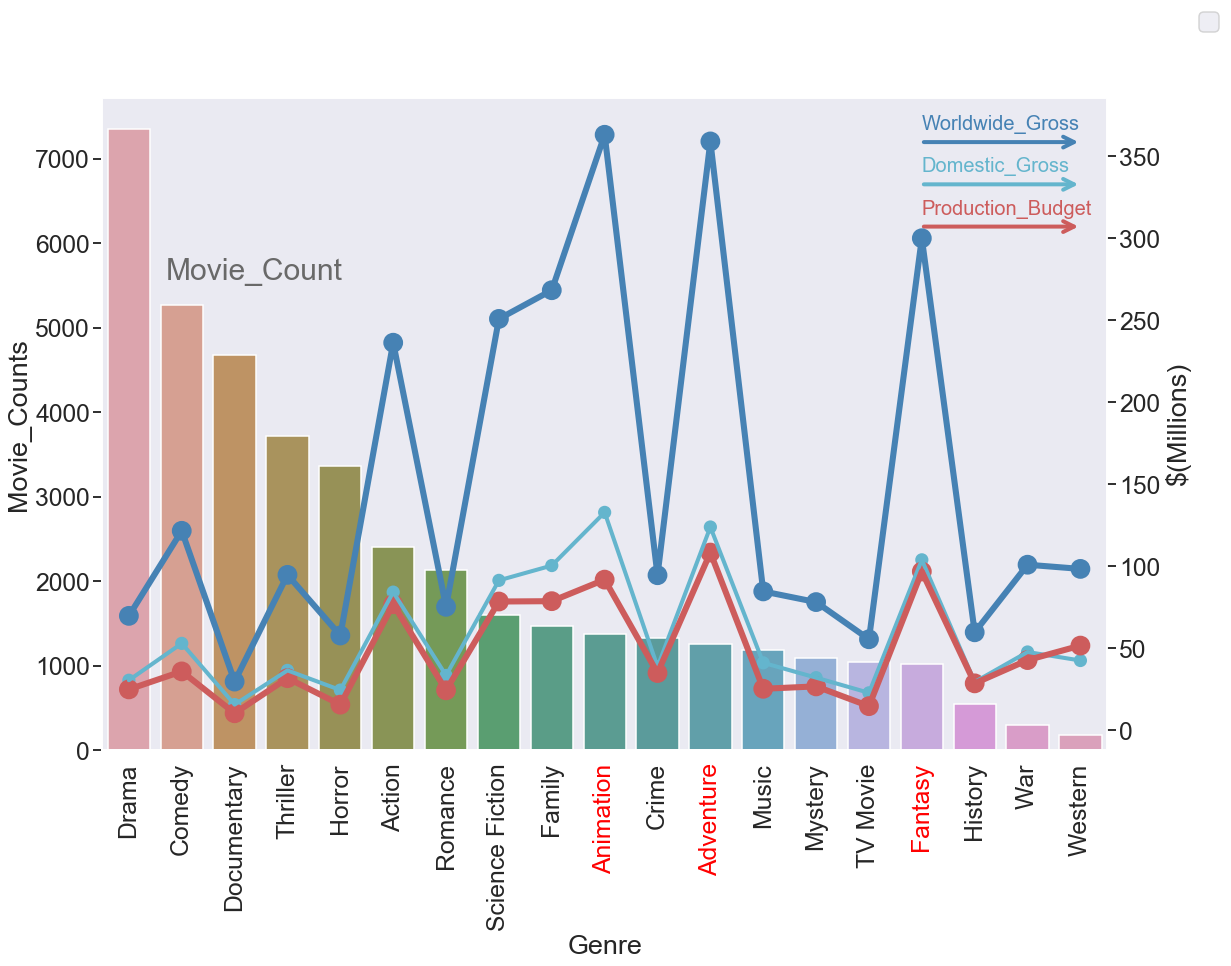

In [72]:
fig, ax = plt.subplots(figsize = (18,12))
sns.set(style='dark',font_scale=1.5, context='talk')
fig.legend(labels = ('Movie_Counts', 'worldwide_gross', 'domestic_gross', 'production_budget'))
ax2=ax.twinx()
#data
data_count = genre_group.count().sort_values('title',ascending = False)['title'] #movie count
idx = data_count.index #index with count
data_grossW = genre_group.mean().loc[idx,'worldwide_gross']#avg worldwide_gross
data_grossD = genre_group.mean().loc[idx,'domestic_gross_x']#avg worldwide_gross
data_budget = genre_group.mean().loc[idx,'production_budget'] #production_budget
#sns - movie count
movie_count = sns.barplot(ax = ax, 
            x = idx, 
            y = data_count.values,
            saturation=0.5              
            )
#sns - avg domestic gross

worldwide_gross=sns.pointplot(ax=ax2, 
             x = idx,
             y = data_grossW.values,
             scale = 1.5,
             color = 'steelblue'
             ) 
domestic_gross=sns.pointplot(ax=ax2, 
             x = idx,
             y = data_grossD.values,
             color = 'c'
             ) 
budget=sns.pointplot(ax=ax2, 
             x = idx,
             y = data_budget.values,
             color = 'indianred',
             scale = 1.5
             ) 

for i in (9, 11, 15):
    movie_count.get_xticklabels()[i].set_color('red')
movie_count.set_xticklabels(movie_count.get_xticklabels(), rotation=90)

ax.set_ylabel('Movie_Counts')
ax2.set_ylabel('$(Millions)')
ax.set_xlabel('Genre')

#plt.title('Genre (TMDB_BOX) Analysis')


# Annotate arrow
ax.annotate('',                      # s: str. will leave it blank for no text
             xy=(18, 7200),             # place head of the arrow at point (year 2012 , pop 70)
             xytext=(15, 7200),         # place base of the arrow at point (year 2008 , pop 20)
             #xycoords=(idx,data_vc),         # will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='steelblue', lw=4)
            )

# Annotate Text
ax.annotate('Worldwide_Gross', # text to display
             xy=(15, 7300),                    # start the text at at point (year 2008 , pop 30)
             #rotation=72.5,                  # based on trial and error to match the arrow
             va='bottom',                    # want the text to be vertically 'bottom' aligned
             ha='left',        # want the text to be horizontally 'left' algned.
             color='steelblue',
             fontsize = 20
            )

# Annotate arrow
ax.annotate('',                      # s: str. will leave it blank for no text
             xy=(18, 6700),             # place head of the arrow at point (year 2012 , pop 70)
             xytext=(15, 6700),         # place base of the arrow at point (year 2008 , pop 20)
             #xycoords=(idx,data_vc),         # will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='c', lw=4)
            )

# Annotate Text
ax.annotate('Domestic_Gross', # text to display
             xy=(15, 6800),                    # start the text at at point (year 2008 , pop 30)
             #rotation=72.5,                  # based on trial and error to match the arrow
             va='bottom',                    # want the text to be vertically 'bottom' aligned
             ha='left',        # want the text to be horizontally 'left' algned.
             color='c',
             fontsize = 20
            )

# Annotate arrow
ax.annotate('',                      # s: str. will leave it blank for no text
             xy=(18, 6200),             # place head of the arrow at point (year 2012 , pop 70)
             xytext=(15, 6200),         # place base of the arrow at point (year 2008 , pop 20)
             #xycoords=(idx,data_vc),         # will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='indianred', lw=4)
            )

# Annotate Text
ax.annotate('Production_Budget', # text to display
             xy=(15, 6300),                    # start the text at at point (year 2008 , pop 30)
             #rotation=72.5,                  # based on trial and error to match the arrow
             va='bottom',                    # want the text to be vertically 'bottom' aligned
             ha='left',        # want the text to be horizontally 'left' algned.
             color='indianred',
             fontsize = 20
            )

# Annotate Text
ax.annotate('Movie_Count', # text to display
             xy=(0.7,5500),                    # start the text at at point (year 2008 , pop 30)
             #rotation=72.5,                  # based on trial and error to match the arrow
             va='bottom',                    # want the text to be vertically 'bottom' aligned
             ha='left',        # want the text to be horizontally 'left' algned.
             color='dimgrey',
             fontsize = 30
            )
plt.show()

## Plot - "Genre : Vote-Count"

### Insight
- most voted Genre:
    - Adventure
    - Fantasy 
    - Science Fiction
    - Action 
    
-  While they are not the most occured genre types. They have the highest production budget.   

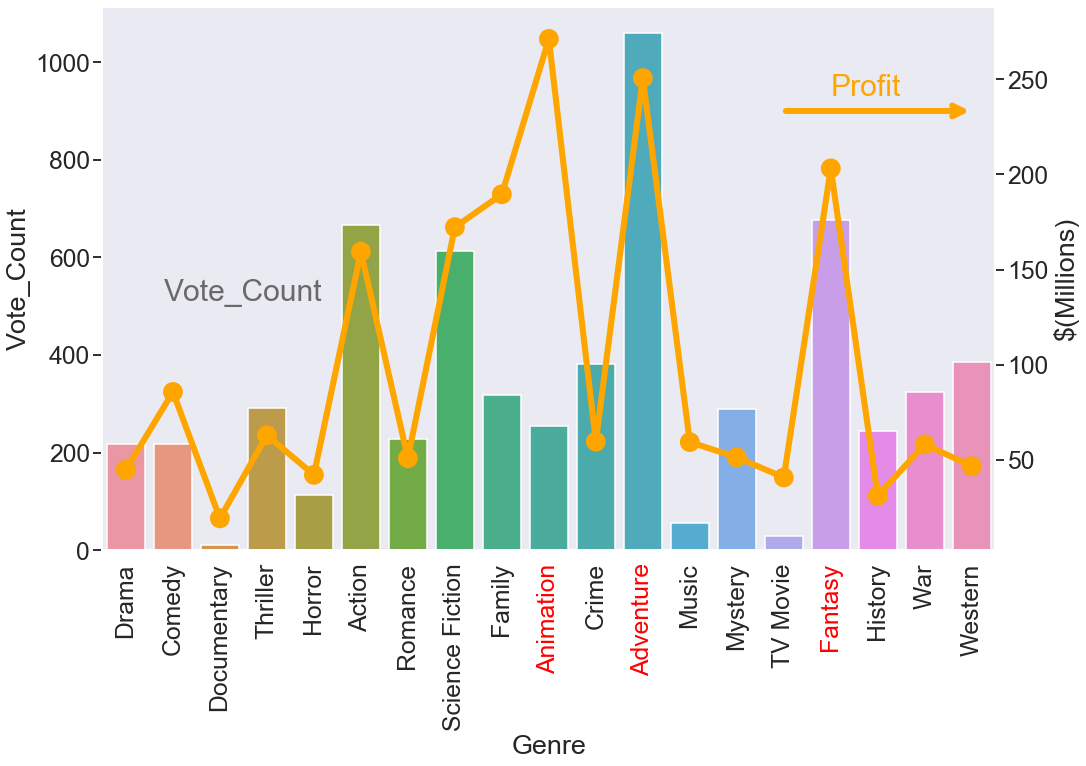

In [73]:
fig, ax = plt.subplots(figsize = (16,10))
sns.set(style='dark',font_scale=1.5, context='talk')
#data
data_count = genre_group.count().sort_values('title',ascending = False)['title'] #movie count
idx = data_count.index #index with count
data_vc = genre_group.mean().loc[idx,'vote_count']#avg vote_count
data_profit = genre_group.mean().loc[idx,'profit']# avg profit
data_grossW = genre_group.mean().loc[idx,'worldwide_gross']#avg worldwide_gross


vote_count = sns.barplot(ax=ax, 
             x = idx,
             y = data_vc.values) 

ax2=ax.twinx()
profit=sns.pointplot(ax=ax2, 
             x = idx,
             y = data_profit.values,
             color = 'orange',
             scale = 1.5
             )             
 
for i in (9, 11, 15):
    vote_count.get_xticklabels()[i].set_color('red')
vote_count.set_xticklabels(vote_count.get_xticklabels(), rotation=90)
ax.set_ylabel('Vote_Count')
ax2.set_ylabel('$(Millions)')
ax.set_xlabel('Genre')

# Annotate arrow
ax.annotate('',                      # s: str. will leave it blank for no text
             xy=(18, 900),             # place head of the arrow at point (year 2012 , pop 70)
             xytext=(14, 900),         # place base of the arrow at point (year 2008 , pop 20)
             #xycoords=(idx,data_vc),         # will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='orange', lw=6)
            )

# Annotate Text
ax.annotate('Profit', # text to display
             xy=(15, 920),                    # start the text at at point (year 2008 , pop 30)
             #rotation=72.5,                  # based on trial and error to match the arrow
             va='bottom',                    # want the text to be vertically 'bottom' aligned
             ha='left',                      # want the text to be horizontally 'left' algned.
             color = 'orange',
             fontsize = 30)
           
# Annotate Text
ax.annotate('Vote_Count', # text to display
             xy=(0.8,500),                    # start the text at at point (year 2008 , pop 30)
             #rotation=72.5,                  # based on trial and error to match the arrow
             va='bottom',                    # want the text to be vertically 'bottom' aligned
             ha='left',        # want the text to be horizontally 'left' algned.
             color='dimgrey',
             fontsize = 30
            )
    
plt.show()

## Profit Insight

- Genre with most Profit:
    - Animation
    - Adventure
    - Fantasy 
    - Family
    - Science Fiction
    - Action
    

## Look into Genres ( top 3 most profitable: distributions & risk of loss)

In [74]:
# get Groups for top 3 genres
g_animation = genre_group.get_group('Animation')
g_adventure = genre_group.get_group('Adventure')
g_fantasy = genre_group.get_group('Fantasy')

In [75]:
# concat into a g_top3 dataframe
g_top3 = pd.concat([g_animation, g_adventure, g_fantasy], axis = 0)

In [77]:
g_top3.head() # check

,title,production_budget,domestic_gross_x,worldwide_gross,studio,original_language,popularity,vote_average,vote_count,date,Year,Month,profit,genre
12,Tangled,260.0,200.821936,586.477240,BV,en,21.511,7.5,6407.0,2010-11-24,2010.0,11.0,326.477240,Animation
32,Toy Story 3,200.0,415.004880,1068.879522,BV,en,24.445,7.7,8340.0,2010-06-17,2010.0,6.0,868.879522,Animation
37,Monsters University,200.0,268.488329,743.588329,BV,en,20.330,7.0,6362.0,2013-06-21,2013.0,6.0,543.588329,Animation
41,Cars 2,200.0,191.450875,560.155383,BV,en,23.498,5.9,4058.0,2011-06-16,2011.0,6.0,360.155383,Animation
76,Coco,175.0,209.726015,798.008101,BV,en,25.961,8.2,8669.0,2017-11-22,2017.0,11.0,623.008101,Animation


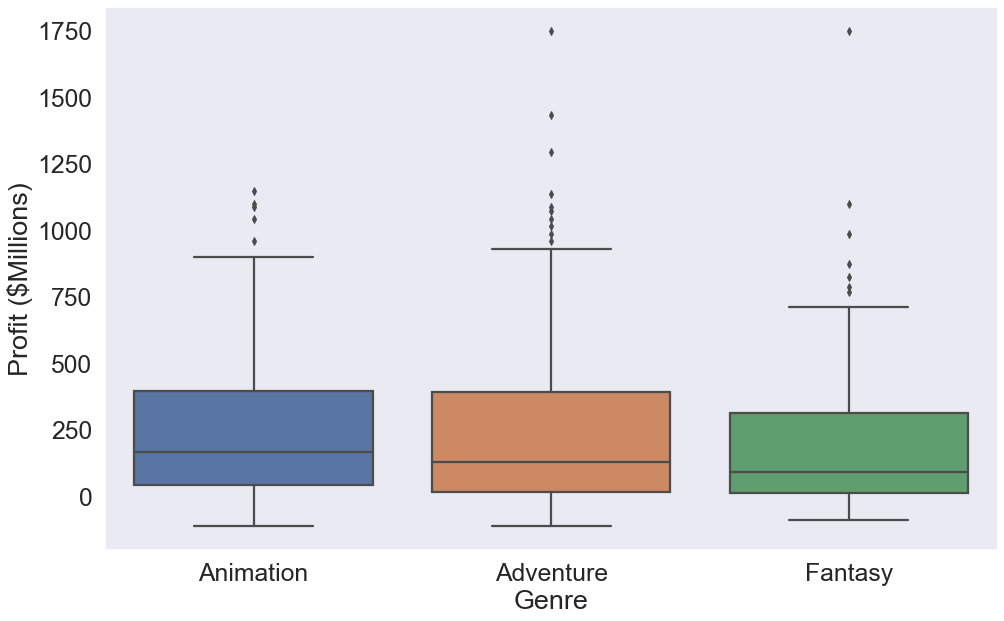

In [78]:
# Action group: Profit Distribution
fig, ax = plt.subplots(figsize = (16,10))
sns.set(style='darkgrid',font_scale=1.5, context='talk')
sns.boxplot(x='genre',y='profit', data=g_top3);
ax.set_ylabel('Profit ($Millions)')
ax.set_xlabel('Genre');

In [79]:
# Tables of Top3 
# (movie_count (with reported gross), loss_count, movie_count(profit >100m), hot_movie_count(profit > 1 billion))

def risk_analysis(df, genre):
    mask = ~df['profit'].isnull()
    mask_loss = df['profit']<=0 
    mask_profit = (df['profit']<1000)& (df['profit']>=100)
    mask_hot = df['profit']>=1000 
    risk_dict = {'Genre':genre,
                'Movie_Count':df[mask].count().title,
                'Loss_Count':df[mask_loss].count().title,
                'Profit100M_Count':df[mask_profit].count().title,
                'Profit1B_Count':df[mask_hot].count().title}
    df_risk = pd.DataFrame.from_dict(risk_dict, orient='index')
    return df_risk.T

In [80]:
df_animation=risk_analysis(g_animation, 'Animation')
df_adventure=risk_analysis(g_adventure, 'Adventure')
df_fantasy=risk_analysis(g_fantasy, 'Fantasy')
genre_risk = pd.concat([df_animation, df_adventure, df_fantasy], axis = 0)

In [82]:
genre_risk  # 

,Genre,Movie_Count,Loss_Count,Profit100M_Count,Profit1B_Count
0,Animation,101,12,62,4
0,Adventure,271,48,144,8
0,Fantasy,164,29,77,2
